# 버스 혼잡도

### 0 : 없음, 3 : 여유, 4 : 보통, 5 : 혼잡, 6 : 매우혼잡
### 각 버스마다 5개의 노선

In [1]:
import numpy as np
import pandas as pd
import pickle
import math
import matplotlib.pyplot as plt
import re
from datetime import datetime

## 분석

In [2]:
file = './bus_data/bus_0_park3'

with open(file, 'rb') as f:
    data = pickle.load(f)

In [3]:
#data

In [4]:
text = data['114000001'][0]['dataTm']

match = re.search(r'\d{4}\d{2}\d{2}', text)
date = datetime.strptime(match.group(), '%Y%m%d').date()
print(date)

2022-06-08


### 혼잡도

In [10]:
arr_1 = []

for key, val in data.items():
    for i in val :
        a = i.get('congetion')
        arr_1.append(a)
        
print(len(arr_1))

15248


In [6]:
arr_1 = []

for key, val in data.items():
    for i in val:
        dt = i.get('dataTm')
        
        if '20220526' in dt : # 0526에 해당하는 날짜만
            a = i.get('congetion')
            arr_1.append(a)
        
print(len(arr_1))

0


In [11]:
congetion_0 = arr_1.count('0')
congetion_3 = arr_1.count('3')
congetion_4 = arr_1.count('4')
congetion_5 = arr_1.count('5')
congetion_6 = arr_1.count('6')

congetion_0

2420

In [12]:
data.keys()

dict_keys(['114000001', '100100359', '111000010', '100100613', '100100522'])

In [18]:
index = []

for key in data.keys():
    index = []
    for i in data[key]:
        a = i.get('congetion')
        index.append(a)
        
    print(key)
    print(len(index))

    congetion_0 = index.count('0')
    congetion_3 = index.count('3')
    congetion_4 = index.count('4')
    congetion_5 = index.count('5')
    congetion_6 = index.count('6')
    values = [congetion_0, congetion_3, congetion_4, congetion_5, congetion_6]

    print(values)

    ratio = []
    T = len(index)
    V = values
    
    for i in V:
        ratio.append(round(i/T,3))

    print(ratio)

114000001
513
[429, 84, 0, 0, 0]
[0.836, 0.164, 0.0, 0.0, 0.0]
100100359
3584
[478, 2755, 311, 40, 0]
[0.133, 0.769, 0.087, 0.011, 0.0]
111000010
3453
[478, 2418, 476, 81, 0]
[0.138, 0.7, 0.138, 0.023, 0.0]
100100613
2864
[544, 2259, 58, 3, 0]
[0.19, 0.789, 0.02, 0.001, 0.0]
100100522
4834
[491, 4059, 263, 21, 0]
[0.102, 0.84, 0.054, 0.004, 0.0]


### 시각화

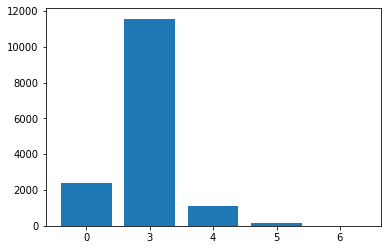

In [17]:
congetion = ['0', '3', '4', '5', '6']
values = [congetion_0, congetion_3, congetion_4, congetion_5, congetion_6]

plt.bar(congetion, values)
plt.show()

### 비율

In [168]:
ratio = []
T = len(arr_1)
V = values

for i in V:
    ratio.append(i/T)
    
print(ratio)

None


## 최종

In [189]:
def cal(path):
    print("<< " + path.split("/")[-1][:5] + " >>")
    with open(path, 'rb') as f:
        data = pickle.load(f)
    
    arr = []
    total = []
    total_val = [0]*5
    total_ratio = [0]*5
    
    for key in data.keys():
        arr = []
        for i in data[key]:
            a = i.get('congetion')
            arr.append(a)
            total.append(a)
        
        print("Bus ID: ", key)
        print("총 혼잡도: ",len(arr))

#         congetion = ['0', '3', '4', '5', '6']  ## 그래프 인자
        congetion_0 = arr.count('0')
        congetion_3 = arr.count('3')
        congetion_4 = arr.count('4')
        congetion_5 = arr.count('5')
        congetion_6 = arr.count('6')
        values = [congetion_0, congetion_3, congetion_4, congetion_5, congetion_6]
        
        total_val = [values[i] + total_val[i] for i in range(len(values))]

        print("혼잡도 개수: ", values)

        ratio = []
        T = len(arr)
        V = values

        for i in V:
            ratio.append(round(i/T, 3))
            
        total_ratio = [ratio[j] + total_ratio[j] for j in range(len(ratio))]
    
        print("혼잡도 비율: ", ratio)
#         plt.bar(congetion, ratio)   ## 그래프
#         plt.show()
        print("-------------------------------------------------------------------------------------")
    
    total_ratio = [round(i/5, 3) for i in total_ratio]
    
    print("Total: ", len(total))
    print("Total count: ", total_val)
    print("Total ratio: ", total_ratio)
    print("\n")

In [190]:
file = './bus_data/bus_0_park3'
file2 = './bus_data/bus_1_park3'
file3 = './bus_data/bus_2_gahyeon.txt'
file4 = './bus_data/bus_3_gahyeon.txt'
file5 = './bus_data/bus_4_dael.txt'
file6 = './bus_data/bus_5_dael.txt'

cal(file)
cal(file2)
cal(file3)
cal(file4)
cal(file5)
cal(file6)

<< bus_0 >>
Bus ID:  114000001
총 혼잡도:  513
혼잡도 개수:  [429, 84, 0, 0, 0]
혼잡도 비율:  [0.836, 0.164, 0.0, 0.0, 0.0]
-------------------------------------------------------------------------------------
Bus ID:  100100359
총 혼잡도:  3584
혼잡도 개수:  [478, 2755, 311, 40, 0]
혼잡도 비율:  [0.133, 0.769, 0.087, 0.011, 0.0]
-------------------------------------------------------------------------------------
Bus ID:  111000010
총 혼잡도:  3453
혼잡도 개수:  [478, 2418, 476, 81, 0]
혼잡도 비율:  [0.138, 0.7, 0.138, 0.023, 0.0]
-------------------------------------------------------------------------------------
Bus ID:  100100613
총 혼잡도:  2864
혼잡도 개수:  [544, 2259, 58, 3, 0]
혼잡도 비율:  [0.19, 0.789, 0.02, 0.001, 0.0]
-------------------------------------------------------------------------------------
Bus ID:  100100522
총 혼잡도:  4834
혼잡도 개수:  [491, 4059, 263, 21, 0]
혼잡도 비율:  [0.102, 0.84, 0.054, 0.004, 0.0]
-------------------------------------------------------------------------------------
Total:  15248
Total count:  [2420, 